In [121]:
import numpy as np
import cv2
import os
import math
import imageio
import pandas as pd

import imgaug as ia
from imgaug import augmenters as iaa
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
%matplotlib inline

from glob import glob 
import re

import xml.etree.ElementTree as ET
import shutil


In [122]:
data_dir="data"

if not os.path.isdir(data_dir):
    os.makedirs(data_dir)
    
img_dir = "data/cards"

if not os.path.isdir(img_dir):
    os.makedirs(img_dir)

#path=glob(img_dir + "/*.jpg")
#img = cv2.imread(img_dir + "/IMG-0552.jpg",0)
img = imageio.imread(img_dir + "/IMG-0552.jpg") 
# show image
# cv2.imshow('image',img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

images = np.array([img], dtype=np.uint8)
print(images.shape)
print(img.shape)
#print(img2.shape)

(1, 1663, 1190, 3)
(1663, 1190, 3)


In [123]:
cardW=63
cardH=88
cornerXmin=2
cornerXmax=43
cornerYmin=2
cornerYmax=43
mmToPixel = 3.7795

card_suits=['s','h','d','c']
card_values=['A','K','Q','J','10','9','8','7','6','5','4','3','2']

# We convert the measures from mm to pixels: multiply by an arbitrary factor 'zoom'
# You shouldn't need to change this
zoom=4
cardW*=zoom
cardH*=zoom

corners = [cornerXmin,cornerXmax,cornerYmin,cornerYmax]
print(corners)
corners = [int(i*zoom*mmToPixel) for i in corners]

pixelW = math.ceil(cardW * 3.78)
pixelH = math.ceil(cardH * 3.78)
print(corners)

[2, 43, 2, 43]
[30, 650, 30, 650]


In [124]:
img = ia.imresize_single_image(img, (pixelH, pixelW))


2


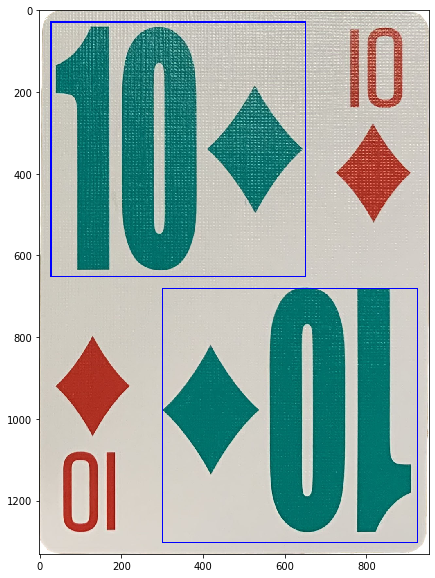

In [125]:
bbs = BoundingBoxesOnImage([
    BoundingBox(x1=corners[0], x2=corners[1], y1=corners[2], y2=corners[3]),
    BoundingBox(x1=pixelW-corners[0], x2=pixelW-corners[1], y1=pixelH-corners[2], y2=pixelH-corners[3])
], shape=img.shape)

print(cornerXmin)

image_before = bbs.draw_on_image(img, size=3,color=[0, 0, 255])

#ia.imshow(bbs.draw_on_image(images, size=2))
# cv2.imshow('image',image_before)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.figure(figsize=(10,10))
plt.imshow(image_before) # display the image

plt.show()
